<br>
<br>
<br>
<br>

# DAV 6150 Module 6: Regression Modeling for Numeric Response Variables
<br>
<br>
<br>

# Module 4 Assignment Review


### How to approach this (or analogous) problem(s):

1) __EDA__: Calculate correlation metrics amongst all variables; Look for potential collinearity amongst explanatory variables; Examine distributions + summary statistics of all variables + comment on their appearance; Plot relationships between each potential explanatory variable and the response variable - what kinds of preliminary predictive inferences can we derive? Identify missing data values; etc.

2) __Data Preparation__: how to handle missing data values? If imputation is needed, which imputation approach is likely to be the most effective relative to the data at hand, e.g., use a predictive model? KNN? similarity? a mean/median/mode? etc. Note that use of a mean is typically a "last resort" when no other approach is practical. How to handle non-normal distributions? Do we need to somehow normalize our data? How to handle numeric attributes having vastly different value ranges? Should we standardize or re-scale our data via some other method? etc..

3) __Dimensionality Reduction + Feature Selection__: Based on the results of your EDA, select the explanatory variables you believe are likely to be the most useful within your model(s). Exclude variables that are highly correlated with one another (i.e., "collinear"). Exclude variables that exhibit low variance. Consider excluding variables that exhibit little relation with the response variable. Do all of this __before__ use of PCA or recursive feature elimination or VIF's or p-value analysis.

### What types of models were used? Some examples:

- Apply PCA to continuous numeric data; select some number of PC's; use selected PC's as the basis of a regression model (excluding all categorical explanatory variables).


- Apply PCA to continuous numeric data; select some number of PC's; use selected PC's + a subset categorical variables as the basis of a regression model. Refine model via use of backward and bi-directional selection and VIFs.


- Use correlation thresholds, then recursive feature elimination (p-value analysis), to produce a model with a small number of statistically significant and variables


## Suggestions for Future Work:

### Make sure you are engaging with ALL of the assigned reading materials within a given Module

It was quite obvious from the M4 Assignment submits that significant learning materials were not reviewed prior to beginning work on the M4 Assignment. Relying solely on the content of your Live Session Lecture Notes will not ensure your success in this course. As was discussed at the start of the semester, the Lecture Notes do not cover every aspect of the content of a Module, and just because something is not covered within the Lecture Notes does not mean it is not important or relevant. The assigned readings cover a wide range of concepts and also provide many Python-based examples of how to properly implement those concepts. As such, if you are not engaging with those materials, you are unlikely to absorb/master a great deal of relevant knowledge available to you within this course.

### Use the results of your EDA as the starting point for all downstream work

When asked to apply dimensionality reduction and/or feature selection methods to a data set, we should rely upon the results of our EDA work, i.e., our starting point should be the use of the correlation metrics and preliminary predictive inferences we've derived from the data.

We should __NOT__ start by simply throwing all of the data we've been given into a backward selection process or PCA: why bother with an EDA if you are simply going to ignore its results? The results of a thorough EDA will typically allow us to construct our models in a much more efficient and effective manner than will simply throwing our hands up and arbitrarily forcing all of our data into a model.

### Skewed distributions? Consider transforming them to improve model performance

As we discussed in Module 3, many machine learning algorithms require that numeric data attributes conform to a relatively Gaussian distribution. Box-Cox Transforms ( https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/) can be applied to many non-normally distributed numeric variables for purposes of transforming such distributions into dispersements that are more Gaussian in nature.


### Avoid the use of Python-based tools that you don't fully understand

While Python (and many other languages) often provide very simple + highly abstracted tools that enable the implementation of very complex concepts via a very small amount of Python code, we should avoid the use of tools we don't fully understand. Improper use of such highly abstracted tools without sufficient knowledge of their underlying algorithms can easily result in our work being compromised by inaccurate and/or irrelevant results/output while also requiring the computation of large amounts of potentially unnecessary calculations.


### PCA

__Can we apply PCA to categorical features that have been converted to nominal numeric values (e.g., via one-hot encoding or label enconding)?__

The answer is __NO__, we should __NEVER__ apply PCA to __ANY__ type of categorical data, even if the categorical information has been converted to (or was always in) numerical format. __PCA__ is meant to be __applied to continuous variables__, for which it tries to maximize the variance (i.e, the squared deviations) of the data. The concept of squared deviations doesn't really exist when applied to binary or label encoded data.

By contrast, __categorical data is measured on a nominal scale__ meaning that the category spacing has no interval/ratio meaning.

So while you can obtain an output from a PCA algorithm based on numeric encodings of categorical inputs, the output is highly unlikely to have any relevant "meaning" (i.e., garbage in ... garbage out).


__Prior to applying PCA to a set of continuous numeric data, should we remove features that appear to be highly correlated?__

Retaining highly correlated features can cause PCA to __over-emphasize__ the contribution of the highly correlated variables within the principal components + potentially change the direction of the associated eigenvectors and/or the magnitude of the associated eigenvalues. Here's a link to a fairly good explanation of this phenomena: https://stats.stackexchange.com/questions/50537/should-one-remove-highly-correlated-variables-before-doing-pca

So the answer to the question is __YES__, we should attempt to remove features that appear to be highly correlated with one another prior to applying PCA to a set of continuous numeric data.


__Create a plot of cumulative explained variance to help you decide how many principal components to retain__

The PCA content within __Module 4__ provides examples of how to properly determine the number of principal components to retain. Examples are provided in both the __MLPR__ and __HOML__ textbooks.


### Variance Inflation Factors

Variance inflation factors (VIFs) are an __OUTPUT__ of __a series of regression models__. To calculate VIFs for a set of explanatory variables, we need to regress every explanatory variable against every other possible explanatory variable. That's $N * (N-1)$ regression models !!!

Therefore, we should __NOT__ be using VIFs __before__ we've attempted to remove highly correlated explanatory variables from a data set. VIFs are appropriately derived __from the output of regression models we have constructed using the knowledge we've gained from our EDA work__. This avoids the use of many arbitrary + unnecessary calculations while also __contextualizing the VIFs relative to a model that has been constructed via a process informed inquiry__, as opposed to an arbitrary calculation of VIFs prior to the application of the domain knowledge we develop via an EDA process.

By contrast, when __evaluating__ "least squares"-based regression models (e.g., linear regression models), we should assess VIF metrics even after we've eliminated all non-statistically significant variables to ensure that the remaining variables are not collinear.

<br>
<br>

# Regression Modeling for Numeric Response Variables

In general, the phrase __regression modeling__ refers to the process of estimating the strength of the relationship between one variable (the __"Response" (aka "Dependent") variable__) and one or more __"Explanatory" (aka "Independent") variables__.


Regression modeling is widely used for purposes of __predicting the mean numerical value of the response variable__ when given specific values for the explanatory variables.


There are many different types of regression models, and the characteristics of each vary depending on the type of response variable you are attempting to estimate. Some of the most widely used types of regression models for __numerical response variables__ include:

- __Linear Regression__: Used for fitting a linear equation for a __continuous__ numeric response variable. The relationship between the response and explanatory variable(s) is assumed to be __linear__ in nature. The output is a __linear equation__. If there is only one explanatory variable, we use __Simple Linear Regression__. If there is more than one explanatory variable, we use __Multiple Linear Regression__.


- __"Count" Regression__: The response variable contains __non-negative__ (i.e., x >= 0) __discrete__ numeric "count" values while the explanatory variables can be either binary, discrete or continuous. Commonly used regression techniques for modeling count data include __Poisson Regression__ (where the response variable __must__ have a Poisson distribution), __Negative Binomial Regression__ (where the response variable need not have a Poisson distribution), and __Zero-Inflated Negative Binomial Regression__ (used when the response variable contains an excessive number of 'zero' values).


- __Polynomial Regression__: Used when a __non-linear__ relationship exists between a continuous response variable and explanatory variables that are either binary, discrete or continuous. The ouput is a __non-linear__ equation.


\*\* Please note that there are __many__ other types of regression models (e.g., Lasso, Ridge, Partial Least Squares, etc.), and describing each of them is beyond the scope of this lecture.\*\*

## Linear Regression

Linear regression consists of finding the best fitting straight line through a set of data points. That line is called a __regression line__. An example:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

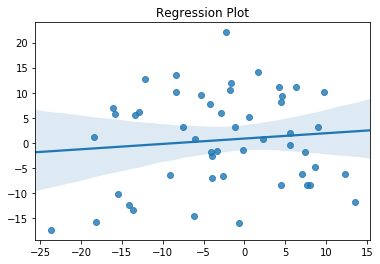

In [ ]:
# generate some random data to use for the plot
x = np.random.randn(50) * 10

y = np.random.randn(50) * 10

# first define a Matplotlib figure
plt.figure()

# use Seaborn's regplot() function to plot the regression line for the
sns.regplot(x, y)

# give the plot a title using Matplotlib
plt.title('Regression Plot');

Simple linear regression equations take the form of
$y' = bx + a$ where $y'$ is the predicted value of the response variable for a given value of the explanatory variable $x$, $b$ is the slope of the regression line, $x$ is the value of the explanatory variable and $a$ is a constant representing the y-intercept of the regression line.


The regression line is created by using the known values of the explanatory variable $x$ and the known values of the response variable $y$ to find the slope $b$ and y-intercept $a$ of the line that minimizes the sum of the squared errors of the predicted values of $y'$.


We calculate values for the slope $b$ and the y-intercept $a$ using the means and standard deviations of the known values of $x$ and $y$ as well as the correlation coefficient $r$ of $x$ and $y$:

$b = r * stddev(y)/stddev(x) $

$a = mean(y) - b(mean(x))$

__NOTE:__ The Python modeling libraries we are discussing below do these calculations for you. The calculations are shown here simply to provide further context.

A simple linear regression example:

http://onlinestatbook.com/2/regression/intro.html

## Multiple Linear Regression

When using multiple explanatory variables, the regression line __cannot be visualized within a two-dimensional space__. However, it is still relatively easy to compute: the regression line is estimated using the formula

$y' = a + b1x1 + b2x2 + .. +bnxn$


where $y'$ is the predicted value for the response variable for given values of the explanatory variables x1, x2, .., xn, and the $b$ values represent the __independent contributions__ of the corresponding explanatory variable to the prediction of the response variable.  

For those who desire further explanation of the underlying mathematics:

http://faculty.cas.usf.edu/mbrannick/regression/Reg2IV.html

## Count Regression

Unlike linear regression, __count regression__ is appropriate for models in which the response variable is a __non-negative integer__.  The response variable should follow either a __Poisson distribution__ (i.e., mean == variance) or an __overdispersed distribution__ (i.e., variance > mean).


#### Why not just use some form of linear regression for estimating non-negative integers?

-  The relationship between the explanatory variables and the non-negative integer response variable __are unlikely to be linear__.


-  Linear regression can produce __negative floating point numbers__, which are clearly not valid if the response variable is known to be a non-negative integer.


-  The distribution of the residuals from a linear regression model that has been applied to a non-negative integer response variable __will not be random__.


### Poisson Regression

If your data follows a Poisson distribution, __Poisson Regression__ can be an effective tool for estimating the non-negative integer response variable. The probability mass function (PMF) for a Poisson distribution is:

# $p(X = k) =  \frac{\lambda^k e^{-\lambda}} {k!}$

where $k$ is any non-negative integer, $e$ is the natural exponent $e = 2.71828$, and $\lambda$ is the mean value of the response variable.  (Note that the mean is equivalent to the variance in a Poisson distribution). Using the PMF we can estimate the likelihood of any value within a Poisson distribution.

Poisson regression incorporates this PMF as it calculates a __Maximum Likelihood Estimation__ for the regression coefficients that maximize the likelihoods of the individual response variable values.

The output of the algorithm will be the __natural log__ of the count value you are attempting to estimate. Therefore, you must __exponentiate__ the output of the model to determine the actual estimated values for the count variable.

__How to interpret the model's coefficients__: "For a one unit change in $X_k$, the estimated count changes by a factor of $exp(\beta_k)$, assuming all other variables are held constant." However, in practice it is very common to simply examine the __directionality__ of the coefficients, i.e., if a coefficient is __negative__, then the larger the value of the explanatory variable, the more it will tend to __decrease__ the magnitude of the response variable. Conversely, if a coefficient is __positive__, then the larger the value of the explanatory variable, the more it will tend to __increase__ the magnitude of the response variable.


See this article from the assigned readings for more detail on the underlying mathematics + an example of how to implement Poisson regression in Python: https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958


### Negative Binomial Regression

If your data is __over dispersed__ (i.e, variance > mean), __Negative Binomial Regression__ can be an effective tool for estimating the non-negative integer response variable. The probability mass function (PMF) for a Negative Binomial ("overdispersed") distribution is:

# $p(X = n) =  \frac{(n-1)!} {(r-1)!(n-r)!}p^r (1-p)^{(n-r)}$

where $n$ is the number of attempts, $r$ is the number of successes, and $p$ is the probability of success. For our purposes "probability of success" represents the likelihood that the response variable has been observed having a specific value (e.g., 0 or 1 or 2 or ...).

Negative Binomial regression incorporates this PMF as it calculates a __Maximum Likelihood Estimation__ for the regression coefficients that maximize the likelihoods of the individual response variable values.

As with Poisson regression, the output of the negative binomial regression algorithm will be the __natural log__ of the count value you are attempting to estimate. Therefore, you must __exponentiate__ the output of the model to determine the actual estimated value for the count variable.

__How to interpret the model's coefficients__: Interpretation of the explanatory variable coefficients is identical to Poisson regression: "For a one unit change in $X_k$, the estimated count changes by a factor of $exp(\beta_k)$, assuming all other variables are held constant." However, in practice it is very common to simply examine the __directionality__ of the coefficients, i.e., if a coefficient is __negative__, then the larger the value of the explanatory variable, the more it will tend to __decrease__ the magnitude of the response variable. Conversely, if a coefficient is __positive__, then the larger the value of the explanatory variable, the more it will tend to __increase__ the magnitude of the response variable.

See this article from the assigned readings for an explanation of how to implement negative binomial regression in Python: https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4


See this article from the assigned readings for an explanation of how to implement __both__ Poisson and Negative Binomial Regression via __Generalized Linear Models__ (GLM's: https://en.wikipedia.org/wiki/Generalized_linear_model) using Python's __statsmodels__ library:


- https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/#cameron


This article provides a detailed tutorial of how to implement both Poisson and Negative Binomial regression using Generalized Linear Models (GLM’s) via Python's statsmodels library. __DAV 6150 students should strongly consider making use of this tutorial when attempting to implement a count regression model within Python__.


## Polynomial Regression

When a __non-linear__ relationship exists between a continuous response variable and explanatory variables that are either binary, discrete or continuous, a linear regression model is highly unlikely to be an effective model. As an alternative, we can substitute a __polynomial equation__ for the standard linear model. The ouput of such a regression model is a __non-linear__ equation.

__What is a non-linear equation?__ An example:

# $y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + \beta_3x_i^3 + ... + \beta_dx_i^d + \epsilon_i $

As $d$ (the degree of the polynomial) increases, the "flexibility" of the regression model increases significantly. See the assigned reading for an example: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

__HOWEVER__, this flexibility comes at a cost: we can easily end up with a model having very high variance (i.e., the model __overfits__ the data). A model with very high variance is unlikely to prove to be effective when applied to previously unseen data.

__THEREFORE__: when using polynomial regression we need to be acutely aware of the __bias vs variance__ tradeoff and work diligently to select a polynomial degree $d$ that strikes a balance between the two.

__It is unusual to use a $d$ of more than 3 or 4__ since using larger values can easily result in overfitting. However, there is no strict limitation on the selection of a value for $d$ so use your empirical skills to help you decide on a value for $d$ that is best suited to the data you are working with.

## Evaluating Regression Model Performance

In __Module 5__ we discussed the following regression model performance metrics:

- $R^2$: Often referred to as "Goodness of fit"; measures how much of the variation in the response variable $y'$ is explained by variation in the explanatory variable(s). In general, __the larger the value of $R^2$, the more accurate the model is__. However, relatively large values of $R^2$ can also be an indication of the model being "overfit" to the training data.


- __Adjusted__ $R^2$: Increases if a new variable added to the model improves the fit of the model by more than would be expected by sheer chance. When comparing two models derived from the same data, models with __higher__ __Adjusted__ $R^2$ scores are preferable to those having relatively lower scores.


- __AIC__: Akaike Information Criteria is a model selection metric that estimates the relative quality of a statistical model for a given set of data. When comparing two models derived from the same data, models with __lower__ __AIC__ scores are preferable to those having relatively higher scores.


- __BIC__: Bayesian Information Criteria is another model selection metric that estimates the unexplained variation in the response variable relative to the given explanatory variables. __BIC__ also imposes a "complexity" penalty when the number of explanatory variables used is increased.  When comparing two models derived from the same data, models with __lower__ __BIC__ scores are preferable to those having relatively higher scores.


- __F Statistic__: Indicates whether a significant amount of variance in the response variable $y'$ is explained by the model. When comparing two models derived from the same data, models with __higher__ __F Statistic__ scores are preferable to those having relatively lower scores.


- __Log Likelihood__: A measure of how well a model fits the underlying data. When comparing two models derived from the same data, models with __higher__ __Log Likelihood__ scores are preferable to those having relatively lower scores.


- __p values__: Measure the statistical significance of the explanatory variables in your model. While you are free to select the significance level on your own, most often 0.05 is used as the maximum bound for significance. As such, if any variable in your model is shown to have a __p value__ that exceeds 0.05, consider removing it from the model to see whether the fit/model selection metrics improve.


- __Root Mean Squared Error (RMSE)__: Average distance of a sample from its observed value to its predicted value. We calculate the RMSE by finding the square root of the average of the squared values of a model's residual values. When comparing two models derived from the same data, models with __lower__ __RMSE__ scores are preferable to those having relatively higher RMSE scores.


These metrics allow us to assess the efficacy of our regression models. Practitioners should examine such metrics whenever they are readily available (e.g., if the software being used generates them automatically). If such metrics are not readily available as output from a model you are testing, you should consider whether your work requires you to calculate them via some other method as a separate step during your model evaluation work.


### Residual Plots & Examining the "Normality" of Residuals

In addition to the metrics listed above, we can also make use of the __residuals__ of a regression model to help us determine whether or not our models are robust.

A __residual__ is the difference between the actual value of a response variable for a given observation and the predicted response variable value for that same observation.

In general, the residuals for __linear regression models__ should be __normally distributed__ and __homoscedastic__ (i.e., their distribution is random across all estimated values and no pattern is emminently obvious). We can assess the residuals of a linear regression model via various types of plots. From your assigned readings (MLPR Ch 15): https://github.com/mattharrison/ml_pocket_reference/blob/master/ch15.ipynb

Note that non-linear models are unlikely to have normally distributed residuals; as such, testing for the normality of residuals of such models is unnecessary.

Read MLPR, Ch. 14, [Regression](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb) (pp. 191-197)
MLPR, Ch. 14
Citation: Harrison, M. (2019). Regression. In Machine Learning Pocket Reference: Working with Structured Data in Python. Sebastopol: O'Reilly Media.

Read HOML, Ch. 4, [Training Models](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb) (pp. 111-118)
HOML, Ch. 4
Citation : Géron, A. (2019). Training models. In Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). Sebastopol: O'Reilly Media.

# Project 1 Guidelines / Requirements